# HW 7

This assignment covers several aspects of Regularizations. 
**DO NOT ERASE MARKDOWN CELLS AND INSTRUCTIONS IN YOUR HW submission**

  * **Q** - QUESTION
  * **A** - Where to input your answer

## Instructions

Keep the following in mind for all notebooks you develop:
* Structure your notebook. 
* Use headings with meaningful levels in Markdown cells, and explain the questions each piece of code is to answer or the reason it is there.
* Make sure your notebook can always be rerun from top to bottom.
* Please start working on this assignment as soon as possible. If you are a beginner in Python this might take a long time. One of the objectives of this assignment is to help you learn python and scikit-learn package. 
* See [README.md](README.md) for homework submission instructions

## Related Tutorials
    
* [Lasso Regression - L1 Regularization](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html)

* [Ridge Regression - L2 Regularization](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)

* [Metrics : Precision-Recall curve](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html)

# Data Processing

**Data** 
* Get the exploratory data and the following files from [link](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)
* Save metadata and the original data from download [Link](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) to your local HW folder. 

```or```

You can load dataset from ```data'' folder into the dataframe.

**Q1** Get training data from the dataframe
1. Load breast-cancer-wisconsin.data into data frame
2. Note: the data file does not contains column names, so include appropriate column names by exploring the metadata file
3. Replace Non-Numeric values with 0
4. Replace Class label ```2 with 0``` and ```4 with 1```

**A1** Replace ??? with code in the code cell below

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

#Read the breast-cancer-wisconsin.data file using the prropriate separator as input to read_csv()
df = pd.read_csv('data/breast-cancer-wisconsin.data', sep = ',')
df.columns = ['Sample Code', 'Clump Thickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion', 'Epithelial Cell Size', 
                'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']
print(df.isna().sum())
df.info()
df.head()


Sample Code             0
Clump Thickness         0
Cell Size               0
Cell Shape              0
Marginal Adhesion       0
Epithelial Cell Size    0
Bare Nuclei             0
Bland Chromatin         0
Normal Nucleoli         0
Mitoses                 0
Class                   0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Sample Code           698 non-null    int64 
 1   Clump Thickness       698 non-null    int64 
 2   Cell Size             698 non-null    int64 
 3   Cell Shape            698 non-null    int64 
 4   Marginal Adhesion     698 non-null    int64 
 5   Epithelial Cell Size  698 non-null    int64 
 6   Bare Nuclei           698 non-null    object
 7   Bland Chromatin       698 non-null    int64 
 8   Normal Nucleoli       698 non-null    int64 
 9   Mitoses               698 non-null    int

,Sample Code,Clump Thickness,Cell Size,Cell Shape,Marginal Adhesion,Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [2]:
# Replace Non numeric values with 0 
df.replace('?', 0)
df.fillna(0)
df['Bare Nuclei'] = pd.to_numeric(df['Bare Nuclei'], errors = 'coerce')

#Replace the Class label values following above given instructions
df['Class'].replace(2, 0, inplace = True)
df['Class'].replace(4, 1, inplace = True)
df.head()

,Sample Code,Clump Thickness,Cell Size,Cell Shape,Marginal Adhesion,Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10.0,3,2,1,0
1,1015425,3,1,1,1,2,2.0,3,1,1,0
2,1016277,6,8,8,1,3,4.0,3,7,1,0
3,1017023,4,1,1,3,2,1.0,3,1,1,0
4,1017122,8,10,10,8,7,10.0,9,7,1,1


**Q2**

1. Assign values of ```Class``` column to ```y```, note you have to use ```.values``` method
2. Drop ```Class``` column from data frame,
3. Assign df values to x
4. Normalize the x dataset using sklearn StandardScaler 
5. Split dataset into train and test data use train_test_split with test_size = 0.2, stratify y and random_state = 1238

**A2** Replace ??? with code in the code cell below

In [3]:
# Assign values of ```Class``` column to y, note you have to use .values method
y = df.Class.values
# Drop 'Class' column from data frame,
df.drop(columns = 'Class', inplace = True)

# Assign df values to x
x = df.values
x = np.nan_to_num(x) #needed to fix the Nan Error in the ridge regression
# View shape of x and y
print(x.shape)
print(y.shape)



(698, 10)
(698,)


In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x)
X_scaled = sc.fit_transform(x)

In [5]:
xtrain, xtest, ytrain, ytest =  train_test_split(X_scaled, y, test_size = .2, random_state = 1238, stratify = y)

# Model Regularization

## Ridge Regularization/ Ridge Regression

**Q3** Train Ridge Regularization Model
1. Create a Ridge Regularization Model using sklearn library, [See the documenttaion for details](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)
2. Fit the model with the train data
3. Predict the values with the test data (use ridge model trained with last value of alpha)
4. Print the coefficients of the model
5. Calculate the test MSE 
6. Get the score from the model using test data
7. Plot Precision-Recall Curve from the ytest & predicted ytest

**Note**
* Here we generate an array of cost values ranging from very big to very small 
  * cost here is variable alpha: alpha is equivalent to lambda in the class.
* Associated with each alpha value is a vector of ridge regression coefficients that we store in a matrix, with 100 rows (one for each value of alpha) and 10 columns (one for each predictor).  

**A3** Replace ??? with code in the code cell below

In [6]:
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

alphas = 10**np.linspace(10,-2,100)*0.5
ridge = Ridge(alpha = alphas)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(xtrain, ytrain)
    coefs.append(ridge.coef_)
    

pred1 = ridge.predict(xtest)   # Use ridge model trained with last value of alpha
print(pd.Series(coefs)) # Print coefficients
mse = mean_squared_error(ytest, pred1)      # Calculate the test MSE
print("Test mean squared error (MSE): {:.2f}".format(mse))

print(ridge.score(xtest, ytest))

0     [-4.0098851347546335e-09, 3.801440370473813e-0...
1     [-5.300831098410653e-09, 5.0252794634149137e-0...
2     [-7.0073848944562154e-09, 6.64312198259655e-08...
3     [-9.263347192407208e-09, 8.781813292725602e-08...
4     [-1.2245594159440735e-08, 1.1609035089135763e-...
                            ...                        
95    [-0.003296598092161806, 0.0868209118225336, 0....
96    [-0.0032965042809317896, 0.086821070461243, 0....
97    [-0.0032964333120574585, 0.08682119045648701, ...
98    [-0.0032963796243492233, 0.08682128122326802, ...
99    [-0.0032963390102177044, 0.08682134988202145, ...
Length: 100, dtype: object
Test mean squared error (MSE): 0.05
0.7841967750065126


### Precision-Recall Curve for Ridge1

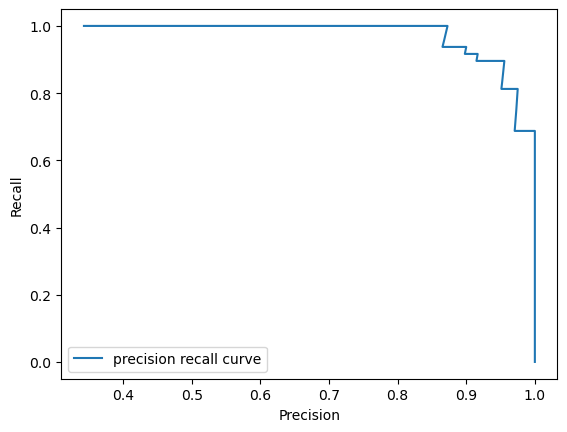

In [7]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

#pass necessary parameters to precision_recall_curve method  
precision, recall, thresholds = precision_recall_curve(ytest, pred1)

plt.plot(precision,recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

**Q4** Train Ridge Regression Model on the training set, and evaluate
1. Now, Create a Ridge Regression passing ```alpha = 4```
2. Fit the model with the train data
3. Predict the values with the test data
4. Print the coefficients of the model
5. Calculate the test MSE 
6. Get the score from the model using test data
7. Plot Precision-Recall Curve from the ytest & predicted ytest

**A4** Replace ??? with code in the code cell below

In [8]:
ridge2 = Ridge(alpha = 4)
ridge2.fit(xtrain, ytrain)       
pred2 = ridge2.predict(xtest)    

#print model coefficients      
print(pd.Series(coefs)) 
mse = mean_squared_error(ytest, pred2)    
print("Test mean squared error (MSE): {:.2f}".format(mse))

#print score  
print(ridge2.score(xtest, ytest))

0     [-4.0098851347546335e-09, 3.801440370473813e-0...
1     [-5.300831098410653e-09, 5.0252794634149137e-0...
2     [-7.0073848944562154e-09, 6.64312198259655e-08...
3     [-9.263347192407208e-09, 8.781813292725602e-08...
4     [-1.2245594159440735e-08, 1.1609035089135763e-...
                            ...                        
95    [-0.003296598092161806, 0.0868209118225336, 0....
96    [-0.0032965042809317896, 0.086821070461243, 0....
97    [-0.0032964333120574585, 0.08682119045648701, ...
98    [-0.0032963796243492233, 0.08682128122326802, ...
99    [-0.0032963390102177044, 0.08682134988202145, ...
Length: 100, dtype: object
Test mean squared error (MSE): 0.05
0.7843884556346933


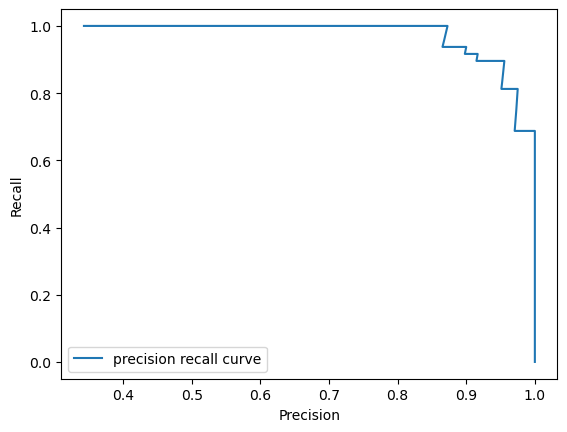

In [9]:
#pass necessary parameters to precision_recall_curve method  
precision, recall, thresholds = precision_recall_curve(ytest, pred2)
plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

**Q5** Train Ridge Regression Model on the training set, and evaluate
1. Now, Create a Ridge Regression passing ```alpha = 100```
2. Fit the model with the train data
3. Predict the values with the test data
4. Print the coefficients of the model
5. Calculate the test MSE 
6. Get the score from the model using test data
7. Plot Precision-Recall Curve from the ytest & predicted ytest

**A5** Replace ??? with code in the code cell below

In [10]:
ridge3 = Ridge(alpha = 100)
ridge3.fit(xtrain, ytrain)             
pred3 = ridge3.predict(xtest)

#print model coefficients      
print(pd.Series(ridge3.coef_)) 
mse = mean_squared_error(ytest, pred3)      
print("Test mean squared error (MSE): {:.2f}".format(mse))

#print score
print(ridge3.score(xtest, ytest))


0   -0.004714
1    0.080873
2    0.055727
3    0.059096
4    0.041697
5    0.026246
6    0.133595
7    0.052402
8    0.053582
9    0.000732
dtype: float64
Test mean squared error (MSE): 0.05
0.7854772782933774


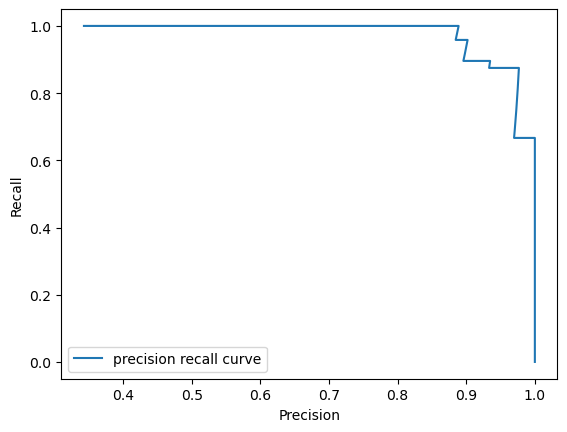

In [11]:
#pass necessary parameters to precision_recall_curve method  
precision, recall, thresholds = precision_recall_curve(ytest, pred3)
plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

**Q6** Train Ridge Regression Model on the training set, and evaluate
1. Now, Create a Ridge Regression passing ```alpha = 0```
2. Fit the model with the train data
3. Predict the values with the test data
4. Print the coefficients of the model
5. Calculate the test MSE 
6. Get the score from the model using test data
7. Plot Precision-Recall Curve from the ytest & predicted ytest

**A6** Replace ??? with code in the code cell below

In [12]:
ridge4 = Ridge(alpha = 0)
ridge4.fit(xtrain, ytrain)    
pred4 = ridge4.predict(xtest)  

#print model coefficients      
print(pd.Series(ridge4.coef_)) 
mse = mean_squared_error(ytest, pred4)
print("Test mean squared error (MSE): {:.2f}".format(mse))

#print score      
#print("Test mean squared error (MSE): {:.2f}".format(?)) ##Duplicate Line
print(ridge4.score(xtest, ytest))

0   -0.003296
1    0.086822
2    0.062863
3    0.051414
4    0.031314
5    0.017945
6    0.171044
7    0.044339
8    0.057959
9   -0.004433
dtype: float64
Test mean squared error (MSE): 0.05
0.7841965201939451


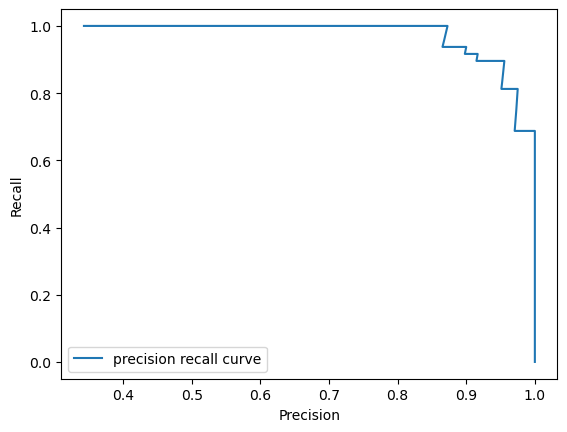

In [13]:
#pass necessary parameters to precision_recall_curve method  
precision, recall, thresholds = precision_recall_curve(ytest, pred4)
plt.plot(precision, recall, label="precision recall curve")

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

**Q7** **Study the codes above and answer the following questions:**

1. Why when passing alpha = 100, the coefficients become very small? 
2. Does alpha = 4 improve the MSE comparing to regular least squares?
3. How the size of alphas affects MSE and the Score of the models? 


**A7** Your answers:
1. Alpha is a tuning parameter, so increasing alpha will skew the results towards 0.
2. It should, because a regular least squares is just a ridge regression with alpha = 0.
3. The larger the alpha value, the more it will shrink towards 0.


# Lasso Regularization

**Q8 Create a Lasso Regression passing ```max_iter = 10000```**

1. set the alphas from the 2nd question for setting parameters in Lasso
2. Fit the model with the train data
3. Predict the values with the test data
4. Print the coefficients of the model
5. Calculate the test MSE 
6. Get the score from the model using test data
7. Plot Precision-Recall Curve from the ytest & predicted ytest


**A8** 

Replace ??? with code in the code cell below


In [14]:
#Lasso regression
lasso = Lasso(max_iter = 10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(xtrain, ytrain)
    coefs.append(lasso.coef_)


pred1_lasso = lasso.predict(xtest)          # Use this model to predict the test data
print(pd.Series(coefs)) # Print coefficients
mse = mean_squared_error(ytest, pred1)         # Calculate the test MSE
print("Test mean squared error (MSE): {:.2f}".format(mse))

print(lasso.score(xtest, ytest))

0     [-0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
1     [-0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
2     [-0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
3     [-0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
4     [-0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
                            ...                        
95    [-0.0, 0.07981667212803872, 0.0654680005124394...
96    [-0.0, 0.08152407842310247, 0.0646532728850947...
97    [-0.0, 0.08281452316609417, 0.0640371058751805...
98    [-0.0, 0.08378932533009117, 0.0635714216449845...
99    [-0.0, 0.08453685977046638, 0.0632108896479213...
Length: 100, dtype: object
Test mean squared error (MSE): 0.05
0.7862153057320115


Text(0, 0.5, 'Recall')

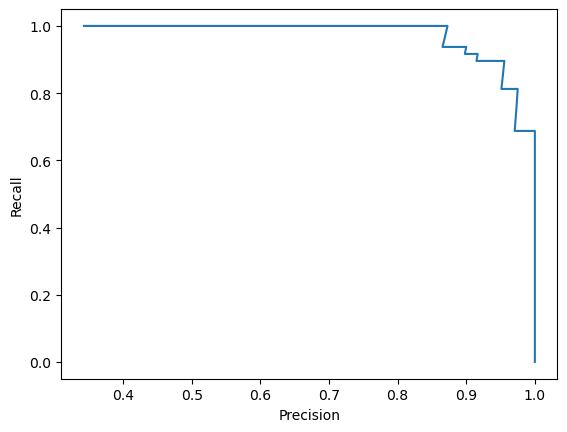

In [15]:
#pass necessary parameters to precision_recall_curve method  
precision, recall, thresholds = precision_recall_curve(ytest, pred1)
plt.plot(precision, recall, label="precision recall curve")

plt.xlabel("Precision")
plt.ylabel("Recall")

## ElasticNet

**Q9 Create a ElasticNet passing ```max_iter = 10000```**

1. Use Cross Validation 15 times for searching best value of alpha for ElasticNet.
2. Fit the model with the train data
3. Print the ```best_alpha``` value
3. Create a new ElasticNet using best value of alpha
4. Fit the model with the train data
4. Print the coefficients of the model
5. Calculate the test MSE 
6. Get the score from the model using test data
7. Plot Precision-Recall Curve from the ytest & predicted ytest


**A9** 

Replace ??? with code in the code cell below


In [16]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

enetcv = ElasticNetCV(max_iter = 10000, cv = 15)
enetcv.fit(xtrain, ytrain)
print("Best alpha: {:.2f}".format(enetcv.alpha_))

enet = ElasticNet(alpha = enetcv.alpha_, max_iter = 10000)
enet.fit(xtrain, ytrain)
enet_pred = enet.predict(xtest)
mse = mean_squared_error(ytest, enet_pred)
print("Test mean squared error (MSE): {:.2f}".format(mse))

print(pd.Series(enet.score(xtest, ytest)))

Best alpha: 0.01
Test mean squared error (MSE): 0.05
0    0.78625
dtype: float64


Text(0, 0.5, 'Recall')

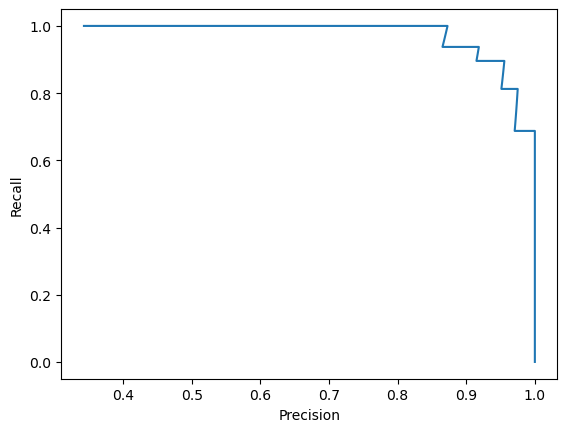

In [17]:
#pass necessary parameters to precision_recall_curve method  
precision, recall, thresholds = precision_recall_curve(ytest, enet_pred)
plt.plot(precision, recall, label="precision recall curve")

plt.xlabel("Precision")
plt.ylabel("Recall")


**Q10 Observe the lasso.coef and ridge.coef, and discuss the findings below**


**A10**  

Your answer goes here: 
Well they both are incredibly similar, and this is alright because neither ridge nor lasso is meant to improve preformance.


**Q11**

1. Is it a good choice to use Lasso regression when most of the columns are significantly useful for the target value? Give explanation supporting your answer.

**A11** 

Your answer goes here:
So if the number of training samples is equal to or less than the number of predicates, then Ridge Regression should be used. But with this data set, it doesn't seem to make any difference.